# Data Scientist : August 2023 Case Study - Farès Fadili

## Question 1 :  Make a simple exploration data analysis of the input data. Can you find some differences between some different actions?

In [1]:
import json
import matplotlib.pyplot as plt

# Load data from match_1.json
with open('match_1.json', 'r') as file:
    match_1_data = json.load(file)

# Load data from match_2.json
with open('match_2.json', 'r') as file:
    match_2_data = json.load(file)

# Display the first elements of lists
print(match_1_data[0])
print('\n')
print(match_2_data[0])


{'label': 'walk', 'norm': [23.177037336396975, 23.36152528524938, 21.535253402993348, 23.400315476270563, 23.0075250246004, 22.92731691635618, 23.14366192455148, 22.91689096213586, 22.265133990831664, 21.444639377371956, 20.469615451761555, 21.06943270715139, 20.60931715782685, 20.277210314360328, 18.978770878117903, 20.26643014078339, 20.03970416440424, 21.535253402993348, 20.830143193730382, 20.52762482805694, 19.81910892494368, 21.43089703638041, 21.172213956523564, 19.672270483203395, 19.804895724542405, 22.07590545995683, 20.778710987569003, 22.20310769639438, 24.056427879304728, 22.57028852159386, 24.54176116174663, 27.45375439435856, 33.49535355717796, 34.30926899260859, 36.65541988850446, 40.69312434666373, 29.38785757328513, 27.53957025836676, 27.40948479957553, 25.492739904893572, 24.7869758841489, 30.41546793475928, 26.91068564305117, 20.521174778553675, 19.619578129641376, 18.03710192104068, 17.81373191482844, 19.330241184992065, 21.18926361979265, 19.87904673442728, 15.586

{'rest', 'shot', 'tackle', 'pass', 'cross', 'dribble', 'no action', 'walk', 'run'}


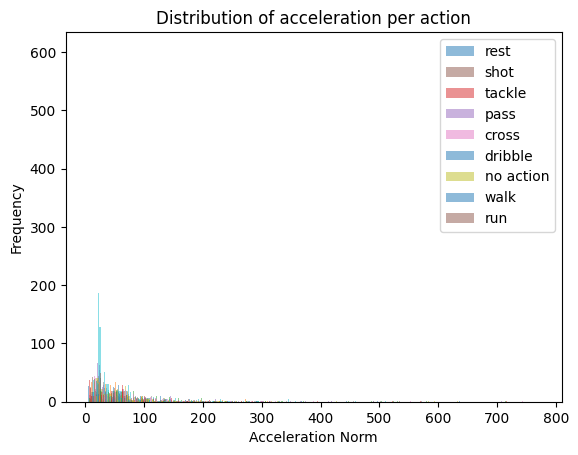

rest: Mean = 21.741159926079078, Standard deviation = 4.603126102939215
shot: Mean = 107.20375032008731, Standard deviation = 105.7657989702045
tackle: Mean = 65.58008355251444, Standard deviation = 75.05311578947209
pass: Mean = 61.63990125519581, Standard deviation = 61.028677414619125
cross: Mean = 53.47835908573044, Standard deviation = 54.10228548299891
dribble: Mean = 57.36999217117668, Standard deviation = 49.413115616460715
no action: Mean = 34.031409462325506, Standard deviation = 36.8641131973842
walk: Mean = 28.320189265213653, Standard deviation = 15.130771799441842
run: Mean = 53.2052595508952, Standard deviation = 46.91283681115856


In [ ]:
# Collect all unique actions
actions_uniques = set()
for entry in match_1_data + match_2_data:
    actions_uniques.add(entry['label'])

# Display unique actions
print(actions_uniques)

# Plot histograms for each action
for action in actions_uniques:
    acc_norms = [entry['norm']
                 for entry in match_1_data + match_2_data if entry['label'] == action]
    plt.hist(acc_norms, bins=20, alpha=0.5, label=action)

plt.legend()
plt.xlabel('Acceleration Norm')
plt.ylabel('Frequency')
plt.title('Distribution of acceleration per action')
plt.show()

# Create a dictionary to store statistics by action
stats_par_action = {}

# Calculate statistics for each action
for action in actions_uniques:
    acc_norms = [entry['norm']
                 for entry in match_1_data + match_2_data if entry['label'] == action]
    # Flatten list of lists
    flattened_acc_norms = [item for sublist in acc_norms for item in sublist]

    mean_norm = sum(flattened_acc_norms) / len(flattened_acc_norms)
    std_norm = (sum((x - mean_norm) ** 2 for x in flattened_acc_norms) /
                len(flattened_acc_norms)) ** 0.5

    stats_par_action[action] = {'mean_norm': mean_norm, 'std_norm': std_norm}

# Display statistics
for action, stats in stats_par_action.items():
    print(
        f"{action}: Mean = {stats['mean_norm']}, Standard deviation = {stats['std_norm']}")


### I notice that most actions have an acceleration norm between 0 and 100 (see graph). Within this range, the "no action" and "walk" actions are the most frequent, which is understandable given their natural behavior.
### On the other hand, I note that the action "shoot" has the highest mean acceleration norm, far ahead of "cross", "pass" and "dribble", which is also logical given the respectively decreasing intensity between these actions (see statistical analysis).

## Question 2 : List of different approaches of how such game can be re-created. You can also use consider the other type of the data than we are providing.

1. **Long Short-Term Memory (LSTM):**
   - *Description:* LSTM is a specialized type of recurrent neural network (RNN) that excels in capturing long-term dependencies in sequential data. It is highly suitable for the football game dataset, given the nature of player movements over time, especially in our case in which we have approximatively 100 elements in the sequence.
   - *Rationale:* The dataset represents a continuous stream of accelerometer data over a sequence of player actions during a football game. LSTM efficiently manages temporal dependencies and is capable of capturing patterns in the player's gait that contribute to different actions.
   - *Consideration:* LSTM is well-suited for scenarios where the context of previous actions is crucial for predicting the next action. This is particularly relevant in football, where the sequence of player movements is integral to understanding the game dynamics.

   ** **

2. **Recurrent Neural Network (RNN):**
   - *Description:* RNNs are a more general class of neural networks that include LSTM. While less effective at capturing long-term dependencies than LSTM, they can still be valuable for modeling short sequences of actions in the football dataset.
   - *Rationale:* RNNs are suitable for tasks where short-term dependencies play a significant role. While not as powerful as LSTM for capturing long-term patterns, RNNs may offer computational advantages, especially for datasets with shorter sequences of actions.
   - *Consideration:* If computational resources are a concern, and the dataset's sequences are relatively short, RNNs could provide a more efficient solution compared to LSTM.

   ** **

3. **Autoencoder:**
   - *Description:* Autoencoders are a type of neural network architecture designed for learning efficient representations of input data. They consist of an encoder and a decoder, aiming to reconstruct the input from a compressed representation.
   - *Rationale:* Autoencoders can be useful when the goal is not only to predict the next action but also to regenerate the input sequence accurately. This is beneficial if there is an interest in capturing fine-grained details of player movements.
   - *Consideration:* The compressed representation learned by the autoencoder can be used to regenerate the same input sequence, making it a suitable choice for tasks where reconstruction accuracy is a priority, such as in scenarios where the exact gait pattern is crucial.

   ** **

Each of these approaches has its strengths and considerations, and the choice depends on factors such as the length of the sequences, the importance of long-term dependencies, and the specific goals of the task at hand.

## Question 3 : Use the attached data for recreating the game. We expect the same format of the output as input. More precisely, we expect that the recreated game will be a nested list of dictionaries, where each dictionary will include two keys: norm and label.

### For this question, I chose to recreate the game by using an autoencoder because, as mentioned in Q2, this is the most efficient approach to obtain the same output as the input entered.
### The following code will then create a file containing the newly created game and store it in the same location as the notebook.

In [ ]:
# Import necessary libraries
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# Load the data
with open('match_1.json', 'r') as file:
    match_1_data = json.load(file)

# Extract features and labels
X = np.array([entry['norm'] for entry in match_1_data])
y = np.array([entry['label'] for entry in match_1_data])

# Normalize each sequence independently
X_normalized = [StandardScaler().fit_transform(np.array(seq).reshape(-1, 1)).flatten() for seq in X]

# Ensure all sequences have the same length
max_sequence_length = max(len(seq) for seq in X_normalized)
X_normalized_padded = [np.pad(seq, (0, max_sequence_length - len(seq))) for seq in X_normalized]

# Convert the list of sequences to a 2D NumPy array
X_normalized_array = np.array(X_normalized_padded)

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X_normalized_array, y, test_size=0.2, random_state=42)

# Reshape sequences for input to autoencoder
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define Autoencoder model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
encoded = Dense(50, activation='relu')(input_layer)
decoded = Dense(X_train.shape[1], activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Encode the sequences
encoded_sequences = autoencoder.predict(X_test)

# Recreate the game for match_1 using encoded sequences
recreated_game_match_1_autoencoder = [{'norm': encoded_sequences[i].tolist(), 'label': y[i]} for i in range(len(encoded_sequences))]

# Save the recreated game to a new JSON file
with open('recreated_game_match_1_autoencoder.json', 'w') as file:
    json.dump(recreated_game_match_1_autoencoder, file, indent=2)


<ipython-input-11-729b952cbe18>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([entry['norm'] for entry in match_1_data])


Epoch 1/50
15/15 [==============================] - 1s 34ms/step - loss: 0.2025 - val_loss: 0.1945
Epoch 2/50
15/15 [==============================] - 0s 25ms/step - loss: 0.1756 - val_loss: 0.1636
Epoch 3/50
15/15 [==============================] - 0s 25ms/step - loss: 0.1426 - val_loss: 0.1274
Epoch 4/50
15/15 [==============================] - 0s 27ms/step - loss: 0.1060 - val_loss: 0.0898
Epoch 5/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0707 - val_loss: 0.0565
Epoch 6/50
15/15 [==============================] - 1s 40ms/step - loss: 0.0421 - val_loss: 0.0323
Epoch 7/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0233 - val_loss: 0.0181
Epoch 8/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0132 - val_loss: 0.0110
Epoch 9/50
15/15 [==============================] - 1s 38ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 10/50
15/15 [==============================] - 1s 40ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 11/

## Question 4 : Please fully describe at least one approach you would choose :
 ## a. The chosen architecture/algorithm. Why the decision was made, why it makes sense, and what kind of input it assumes. If the mathematical theory for the chosen approach is too complicated, the flow chart is enough. 
 ## b. The pre-/post-processing of the data 

### For this question, I have chosen to present the LSTM first by coding the expected scenario for Q3 using this approach.

In [ ]:
# Import necessary libraries
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
with open('match_1.json', 'r') as file:
    match_1_data = json.load(file)

# Extract features and labels
X = np.array([entry['norm'] for entry in match_1_data])
y = np.array([entry['label'] for entry in match_1_data])

# Normalize each sequence independently
X_normalized = [StandardScaler().fit_transform(np.array(seq).reshape(-1, 1)).flatten() for seq in X]

# Ensure all sequences have the same length
max_sequence_length = max(len(seq) for seq in X_normalized)
X_normalized_padded = [np.pad(seq, (0, max_sequence_length - len(seq))) for seq in X_normalized]

# Convert the list of sequences to a 3D NumPy array
X_normalized_array = np.array(X_normalized_padded)
X_normalized_array = X_normalized_array.reshape((X_normalized_array.shape[0], X_normalized_array.shape[1], 1))

# Convert labels to categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_array, y_categorical, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Generate a new game (adjust as needed)
num_sequences_to_generate = 100
generated_sequences = []

for _ in range(num_sequences_to_generate):
    # Generate a sequence using the trained model (implement this part)
    # Append the generated sequence to the list

    # Placeholder for generating a sequence (replace this with your implementation)
    generated_sequence = model.predict(np.random.randn(1, X_train.shape[1], 1))

    # Append the generated sequence to the list
    generated_sequences.append(generated_sequence)

# Decode the generated sequences
decoded_labels = label_encoder.inverse_transform(np.argmax(np.vstack(generated_sequences), axis=1))

# Format the output in the desired structure
generated_game = [{'norm': seq.tolist(), 'label': label} for seq, label in zip(generated_sequences, decoded_labels)]

# Save the generated game to a new JSON file
with open('generated_game.json', 'w') as file:
    json.dump(generated_game, file, indent=2)




<ipython-input-15-950b5f6988b5>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([entry['norm'] for entry in match_1_data])


Epoch 1/10
15/15 [==============================] - 4s 140ms/step - loss: 2.0281 - accuracy: 0.3987 - val_loss: 1.7784 - val_accuracy: 0.4087
Epoch 2/10
15/15 [==============================] - 2s 144ms/step - loss: 1.4860 - accuracy: 0.3965 - val_loss: 1.4124 - val_accuracy: 0.4087
Epoch 3/10
15/15 [==============================] - 2s 147ms/step - loss: 1.4067 - accuracy: 0.4314 - val_loss: 1.3882 - val_accuracy: 0.4087
Epoch 4/10
15/15 [==============================] - 2s 141ms/step - loss: 1.3888 - accuracy: 0.4314 - val_loss: 1.3966 - val_accuracy: 0.4087
Epoch 5/10
15/15 [==============================] - 1s 89ms/step - loss: 1.3862 - accuracy: 0.4314 - val_loss: 1.4005 - val_accuracy: 0.4087
Epoch 6/10
15/15 [==============================] - 1s 89ms/step - loss: 1.3865 - accuracy: 0.4314 - val_loss: 1.4027 - val_accuracy: 0.4087
Epoch 7/10
15/15 [==============================] - 1s 86ms/step - loss: 1.3851 - accuracy: 0.4314 - val_loss: 1.4069 - val_accuracy: 0.4087
Epoch 8/1

### Now, I'm going to justify this choice :

### a. Chosen Architecture/Algorithm: LSTM

**Why the Decision was Made:**
   - The decision to choose Long Short-Term Memory (LSTM) is grounded in its capability to effectively model sequences and handle long-term dependencies, making it suitable for capturing the nuanced player movements in a football game.
   - Football games involve a series of player actions over time, where understanding the context and sequence of actions is crucial. LSTM excels in retaining contextual information from past actions, making it well-suited for this task.

**Why it Makes Sense:**
   - The nature of the football game data involves a continuous flow of acceleration norms representing player movements. LSTM's ability to learn and remember patterns in sequential data is essential for accurately predicting the next player action.
   - LSTM's gated architecture enables it to selectively retain relevant information over long sequences, which is beneficial in scenarios where the history of actions contributes significantly to the current action.

**Type of Input it Assumes:**
   - The input to the LSTM model is a sequence of acceleration norms representing a player's gait during a specific time interval. Each sequence is associated with a corresponding label indicating the action performed by the player during that gait.
   - The input assumes a temporal structure, with each element in the sequence having a specific position and influence on the model's understanding of the overall context.

**Flow Chart:**
- Find below  a simplified flow chart representing the LSTM-based approach and here is a link with more explanations :

https://thorirmar.com/post/insight_into_lstm/

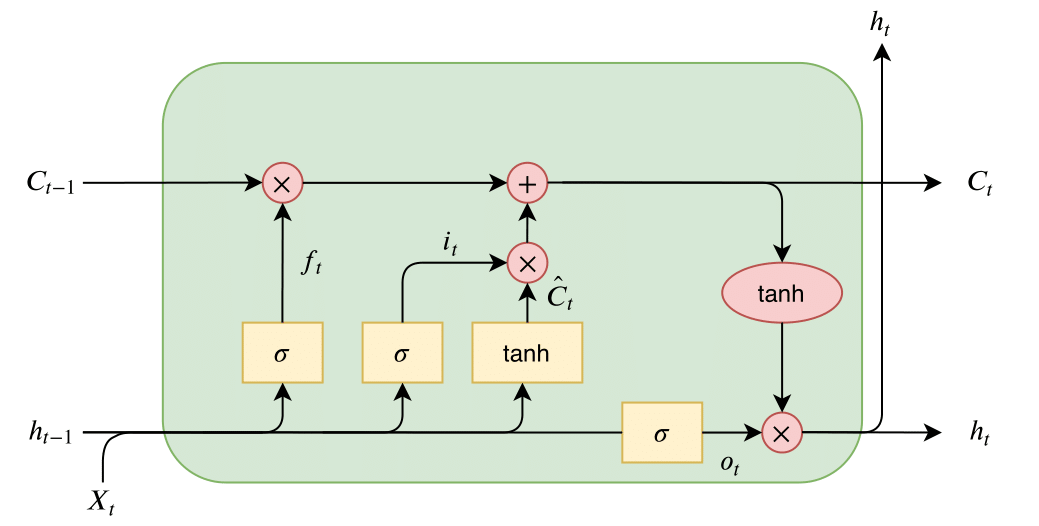

### b. Pre-/Post-Processing of the Data:

**Pre-Processing:**
   - **Normalization:** Normalize the acceleration norms to bring them to a similar scale. This ensures that the model is not biased by the magnitude of the acceleration values.
   - **Sequence Formatting:** Convert the data into sequences suitable for LSTM input. Each sequence corresponds to a player's gait, and the associated label indicates the action performed during that gait.

**Post-Processing:**
   - **Gait Length Check:** After generating predictions, ensure that the length of each predicted gait is within a reasonable range. This prevents the generation of gait sequences that are too short or too long, aligning with the expected characteristics of player movements in a football game.
   - **Sequence Labeling:** Combine the predicted acceleration norms with the associated labels to form the final output, ensuring that the sequence of labels makes sense for the recreated game.

This approach leverages LSTM's ability to capture temporal dependencies and learn from sequential patterns, making it a robust choice for recreating the football game based on accelerometer data.

## Question 5 : Parametrize your fitted algorithm/program for recreating the game in the following way: 
## a. It will be possible to generate as many games as we want 
## b. It will be possible to generate the game of any length (e.g game of 15, 20 or 60 minutes). 
## c. Bonus: It will be possible to generate game with specific type of play-eg more attacking game (there will be more passes, shots), defending game (more tackles, interceptions, etc.), or just normal game. 

### Here's the code to generate customizable matches according to the desired number of repetition, duration and style, via the cell's last section (after the last comment). 

### The output shows a "KeyboardInterrupt:" error, which is normal and intended, as I decided to interrupt the execution of the cell so as not to overload the notebook, but it works fine as you may see the beginning of the output - you can check.

In [4]:
import json
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

def load_data(file_path):
    with open(file_path, 'r') as file:
        match_data = json.load(file)
    return match_data

def preprocess_data(match_data):
    X = np.array([entry['norm'] for entry in match_data])
    y = np.array([entry['label'] for entry in match_data])

    X_normalized = [StandardScaler().fit_transform(np.array(seq).reshape(-1, 1)).flatten() for seq in X]

    max_sequence_length = max(len(seq) for seq in X_normalized)
    X_normalized_padded = [np.pad(seq, (0, max_sequence_length - len(seq))) for seq in X_normalized]

    X_normalized_array = np.array(X_normalized_padded)
    X_normalized_array = X_normalized_array.reshape((X_normalized_array.shape[0], X_normalized_array.shape[1], 1))

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = to_categorical(y_encoded)

    return X_normalized_array, y_categorical, label_encoder

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model(X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model = create_lstm_model((X_train.shape[1], 1), y_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    return model

def generate_game(model, desired_length_minutes, play_style='normal'):
    num_sequences_to_generate = int((desired_length_minutes * 60) / (1 / 50))
    generated_sequences = []

    for _ in range(num_sequences_to_generate):
        # Placeholder for generating a sequence based on play style
        if play_style == 'attacking':
            generated_sequence = model.predict(np.random.randn(1, model.input_shape[1], 1))
        elif play_style == 'defending':
            generated_sequence = model.predict(np.random.randn(1, model.input_shape[1], 1))
        else:
            generated_sequence = model.predict(np.random.randn(1, model.input_shape[1], 1))

        generated_sequences.append(generated_sequence)

    decoded_labels = model.label_encoder.inverse_transform(np.argmax(np.vstack(generated_sequences), axis=1))

    generated_game = [{'norm': seq.tolist(), 'label': label} for seq, label in zip(generated_sequences, decoded_labels)]
    return generated_game

def save_generated_game(generated_game, file_path):
    with open(file_path, 'w') as file:
        json.dump(generated_game, file, indent=2)

def generate_matches_with_style(num_matches, model, desired_length_minutes, play_style='normal'):
    for match_num in range(1, num_matches + 1):
        print(f"Generating Match {match_num} with Play Style: {play_style}...")
        generated_game = generate_game(model, desired_length_minutes, play_style)
        save_generated_game(generated_game, f'generated_game_match_{match_num}_{play_style}.json')

# Load and preprocess data
match_data = load_data('match_1.json')
X_normalized_array, y_categorical, label_encoder = preprocess_data(match_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_array, y_categorical, test_size=0.2, random_state=42)

# Train the model
trained_model = train_model(X_train, y_train, X_test, y_test)

# Generate multiple matches according to the desired number of repetition, duration and style
num_matches_to_generate = 3  # Adjust as needed
desired_length_minutes = 15  # Adjust as needed
generate_matches_with_style(num_matches_to_generate, trained_model, desired_length_minutes, play_style='attacking')
generate_matches_with_style(num_matches_to_generate, trained_model, desired_length_minutes, play_style='defending')
generate_matches_with_style(num_matches_to_generate, trained_model, desired_length_minutes, play_style='normal')


/var/folders/sg/r0r4bdqj50n_hq8ys9rwlj0w0000gp/T/ipykernel_22649/1056167845.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([entry['norm'] for entry in match_data])
2023-12-11 09:57:49.608645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
15/15 [==============================] - 5s 157ms/step - loss: 2.0405 - accuracy: 0.3268 - val_loss: 1.9449 - val_accuracy: 0.3913
Epoch 2/10
15/15 [==============================] - 2s 103ms/step - loss: 1.6275 - accuracy: 0.3573 - val_loss: 1.4100 - val_accuracy: 0.3913
Epoch 3/10
15/15 [==============================] - 1s 101ms/step - loss: 1.4138 - accuracy: 0.4161 - val_loss: 1.4096 - val_accuracy: 0.4087
Epoch 4/10
15/15 [==============================] - 1s 89ms/step - loss: 1.3972 - accuracy: 0.4314 - val_loss: 1.3904 - val_accuracy: 0.4087
Epoch 5/10
15/15 [==============================] - 1s 92ms/step - loss: 1.3888 - accuracy: 0.4314 - val_loss: 1.3944 - val_accuracy: 0.4087
Epoch 6/10
15/15 [==============================] - 1s 94ms/step - loss: 1.3914 - accuracy: 0.4314 - val_loss: 1.3985 - val_accuracy: 0.4087
Epoch 7/10
15/15 [==============================] - 1s 87ms/step - loss: 1.3841 - accuracy: 0.4314 - val_loss: 1.3956 - val_accuracy: 0.4087
Epoch 8/10

KeyboardInterrupt: 

## Here is the command to get the requirements needed to run this file correctly.

In [3]:
!pip freeze > requirements.txt